In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os

data_path = "/kaggle/input/dataset/vn_handwritten_images/data"
json_path = "/kaggle/input/dataset/vn_handwritten_images/labels.json"

In [3]:
import json

# Mở file json
with open(json_path, 'r', encoding='utf8') as f:
  # Chuyển file json thành đối tượng dict trong python
  train_labels = json.load(f)

In [4]:
print(type(train_labels))
print(len(train_labels))

<class 'dict'>
1838


In [5]:
i = 0
for key, value in train_labels.items():
  print(key, ':', value)
  i += 1
  if i == 10:
    break

1.jpg : Số 3 Nguyễn Ngọc Vũ, Hà Nội
2.jpg : Số 30 Nguyên Hồng, Láng Hạ, Đống Đa, Hà Nội
3.jpg : 58 Thái Thịnh, Đống Đa, Hà Nội
4.jpeg : Số 370/8 khu phố 5B, phường Tân Biên, Biên Hòa, Đồng Nai
5.jpg : Vĩnh Trung Plaza, B, 255-257 đường Hùng Vương, phường Vĩnh Trung
6.jpg : Tòa nhà 34T, Hoàng Đạo Thúy, Hà Nội
7.jpg : 40 Cát Linh, Đống Đa, Hà Nội
8.jpg : phòng 101, tầng 1, lô 04-TT5B, khu đô thị Tây Nam Linh Đàm
9.JPG : Nhà 87 ngõ 416 Đê La Thành
10.JPG : Up coworking Space, 89 Láng Hạ, Hà Nội


In [6]:
# Tìm tất cả các kí tự trong labels và cho vào trong set để tránh lặp phần tử
char_list = set()
for label in train_labels.values():
  char_list.update(label)

# Chuyển set thành list đã được sắp xếp theo kí tự tăng dần theo kí tự Unicode
char_list = sorted(char_list)
print(len(char_list))

140


In [7]:
# Show tất cả các kí tự có trong labels
print("".join(char_list))

 #'()+,-./0123456789:ABCDEFGHIJKLMNOPQRSTUVWXYabcdeghiklmnopqrstuvwxyzÂÊÔàáâãèéêìíòóôõùúýăĐđĩũƠơưạảấầẩậắằẵặẻẽếềểễệỉịọỏốồổỗộớờởỡợụủỨứừửữựỳỵỷỹ


In [8]:
# Convert các từ thành 1 mảng index các kí tự dựa trên tập từ điển char_list
def encode_to_labels(txt):
  dig_lst = []

  for index, char in enumerate(txt):
    try:
      dig_lst.append(char_list.index(char))
    except:
      print(f"Không tìm thấy kí tự {char} trong từ điển!")

  return dig_lst

In [9]:
# Kí tự cách sẽ có index=0 trong tập từ điển
print(encode_to_labels("Nam và Chặng"))

print()
print(encode_to_labels("Life is hard"))

[34, 46, 56, 0, 65, 73, 0, 23, 52, 106, 57, 51]

Không tìm thấy kí tự f trong từ điển!
[32, 53, 50, 0, 53, 62, 0, 52, 46, 61, 49]


In [10]:
import pathlib
raw_path = "/kaggle/input/dataset/vn_handwritten_images"

# Find all image paths for train folder 1 and 2 test folder
train_image_path = []

for item in pathlib.Path(raw_path).glob('**/*'):
  if item.is_file() and item.suffix not in [".json"]:
    train_image_path.append(str(item))

In [11]:
train_image_path[:10]

['/kaggle/input/dataset/vn_handwritten_images/data/1122_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/0667_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/1747_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/1179_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/0531_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/0171_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/0578_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/0684_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/0753_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/0577_samples.png']

In [12]:
print(len(train_image_path))

1838


# Preprocessing

In [14]:
# Matching đường dẫn tuyệt đối và labels thay vì mỗi filenames và labels
dict_filepath_label = {}
raw_data_path = pathlib.Path(os.path.join(raw_path))

for item in raw_data_path.glob('**/*.*'):
  file_name = str(os.path.basename(item))

  if file_name != 'labels.json':
    label = train_labels[file_name]
    dict_filepath_label[str(item)] = label

In [15]:
i = 0
for key, value in dict_filepath_label.items():
  print(key, ':', value)

  i += 1
  if i == 10:
    break

/kaggle/input/dataset/vn_handwritten_images/data/1122_samples.png : Số 20/50 đường Hàm Nghi, Phường 1, Thành phố Đông Hà, Quảng Trị
/kaggle/input/dataset/vn_handwritten_images/data/0667_samples.png : 183 Hùng Vương, Phường Cam Lợi, Thành phố Cam Ranh, Khánh Hòa
/kaggle/input/dataset/vn_handwritten_images/data/1747_samples.png : Số 299 Trần Hưng Đạo, Phường Đại Phúc, Thành phố Bắc Ninh, Bắc Ninh
/kaggle/input/dataset/vn_handwritten_images/data/1179_samples.png : 100 Nguyễn Thị Minh Khai, Phường 06, Quận 3, TP Hồ Chí Minh
/kaggle/input/dataset/vn_handwritten_images/data/0531_samples.png : Thôn Tử Dương, Xã Cao Thành, Huyện Ứng Hoà, Hà Nội
/kaggle/input/dataset/vn_handwritten_images/data/0171_samples.png : 185/50 Ba Tháng Hai, Phường 11, Quận 10, TP Hồ Chí Minh
/kaggle/input/dataset/vn_handwritten_images/data/0578_samples.png : 66 đường số 33, khu phố 2, Phường Bình An, Quận 2, TP Hồ Chí Minh
/kaggle/input/dataset/vn_handwritten_images/data/0684_samples.png : 342 Đường D3, Phường 25, Quận

In [16]:
# Tìm maximum label length
label_lens = []

for label in dict_filepath_label.values():
  label_lens.append(len(label))

max_label_len = max(label_lens)
print(max_label_len)

69


In [17]:
all_image_paths = list(dict_filepath_label.keys())

In [18]:
all_image_paths[:10]

['/kaggle/input/dataset/vn_handwritten_images/data/1122_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/0667_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/1747_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/1179_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/0531_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/0171_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/0578_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/0684_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/0753_samples.png',
 '/kaggle/input/dataset/vn_handwritten_images/data/0577_samples.png']

In [19]:
import cv2

# Tìm tất cả các chiều rộng và chiều cao của ảnh (điều này hữu ích nếu các ảnh có kích thước khác nhau)
widths = []
heights = []

# Code đọc ảnh bằng cv2 lâu
'''for image_path in all_image_paths:
  img = cv2.imread(image_path)
  (height, width, _) = img.shape
  heights.append(height)
  widths.append(width)'''

# Code chạy lâu dùng PIL
'''for image_path in all_image_paths:
  img = Image.open(image_path)
  (width, height) = img.size
  widths.append(width)
  heights.append(height)'''

# Dùng PIL để tăng hiệu suất đọc ảnh
from PIL import Image

for image_path in all_image_paths:
  with Image.open(image_path) as img:
    w, h = img.size
    widths.append(w)
    heights.append(h)

In [20]:
min_height = min(heights)
max_height = max(heights)
min_width = min(widths)
max_width = max(widths)

In [21]:
# Thông tin này hữu ích cho making decision cho padding và resizing
(min_height, max_height, min_width, max_width)

(94, 376, 955, 2694)

In [22]:
from sklearn.model_selection import train_test_split
train_image_paths, val_image_paths = train_test_split(all_image_paths,
                                                      test_size=0.2, random_state=42)

In [23]:
print(len(train_image_paths))
print(len(val_image_paths))

1470
368


In [24]:
TIME_STEPS = 240

In [25]:
# Xây dựng pipeline cho hình ảnh

import numpy as np

# Các list cho tập training
training_img = []
training_txt = []
train_input_length = []
train_label_length = []
orig_txt = []
resize_max_width=0
i=0
for train_img_path in train_image_paths:
    # print(f_name)
    # đọc ảnh đầu vào và chuyển sang thang ảnh xám
    img = cv2.cvtColor(cv2.imread(train_img_path), cv2.COLOR_BGR2GRAY)

    # Dùng PIL để tối ưu hiệu suất đọc ảnh
    # img = Image.open(train_img_path).convert('L')

    height, width = img.shape

    img = cv2.resize(img,(int(118/height*width),118))

    height, width = img.shape

    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]

    img = np.pad(img, ((0,0),(0, 2167-width)), 'median')

    img = cv2.GaussianBlur(img, (5,5), 0)

    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)

    # Thêm channel dimension
    img = np.expand_dims(img , axis = 2)

    # Chuẩn hóa hình ảnh
    img = img/255.

    label = dict_filepath_label[train_img_path]

    # chia dữ liệu thành tập valid và tập train tương ứng là 10% và 90%
    orig_txt.append(label)
    train_label_length.append(len(label))

    # time steps cho valid input
    train_input_length.append(TIME_STEPS)
    training_img.append(img)

    # chuyển đổi từ thành số dựa trên charlist
    training_txt.append(encode_to_labels(label))
    i+=1
    if (i%500 == 0):
        print ("has processed trained {} files".format(i))
print(resize_max_width)

has processed trained 500 files
has processed trained 1000 files
2167


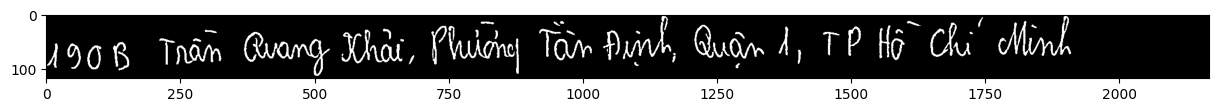

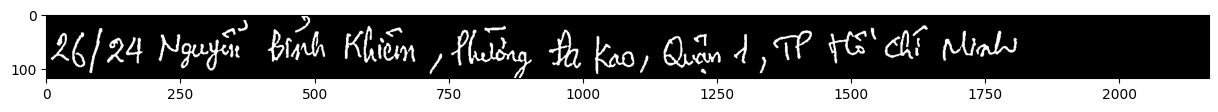

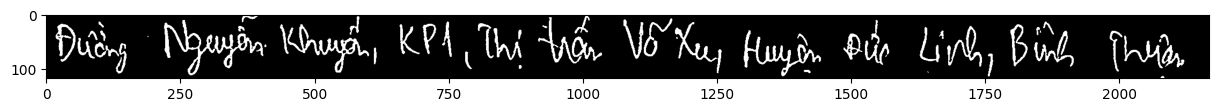

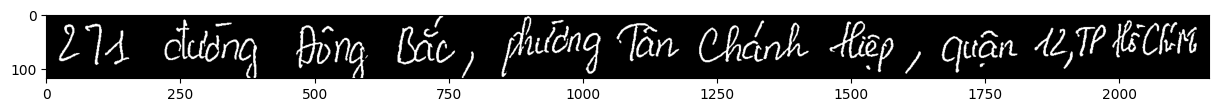

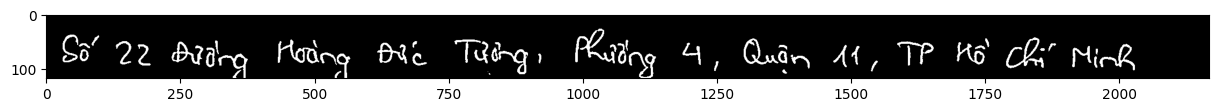

In [26]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(training_img[i][:,:,0], cmap="gray")
    plt.show()

In [27]:
# các list cho tập valid
valid_img = []
valid_txt = []
valid_input_length = []
valid_label_length = []
valid_orig_txt = []

i=0

for val_img_path in val_image_paths:
    # print(f_name)
    # Đọc ảnh đầu vào và chuyển sang thang ảnh xám
    img = cv2.cvtColor(cv2.imread(val_img_path), cv2.COLOR_BGR2GRAY)

    # resize ảnh
    img = cv2.resize(img,(int(118/height*width),118))

    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]

    img = np.pad(img, ((0,0),(0, 2167-width)), 'median')

    # làm mờ ảnh
    img = cv2.GaussianBlur(img, (5,5), 0)

    # Lấy ngưỡng để chuyển thành ảnh nhị phân
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)

    # thêm channel dimension
    img = np.expand_dims(img , axis = 2)

    # Chuẩn hóa hình ảnh
    img = img/255.

    label = dict_filepath_label[val_img_path]

    valid_orig_txt.append(label)
    valid_label_length.append(len(label))

    # time steps cho valid input
    valid_input_length.append(TIME_STEPS)
    valid_img.append(img)

    # Chuyển từ thành số dựa trên charlist
    valid_txt.append(encode_to_labels(label))
    i+=1
    if (i%100 == 0):
        print ("has processed test {} files".format(i))
print(resize_max_width)

has processed test 100 files
has processed test 200 files
has processed test 300 files
2167


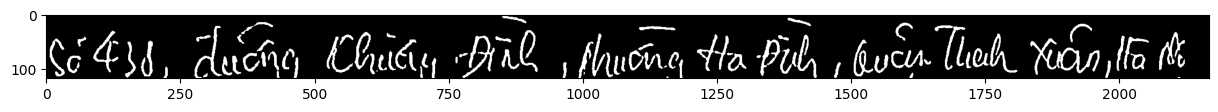

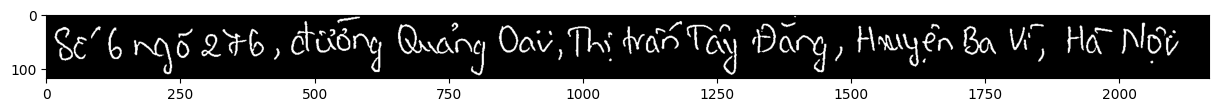

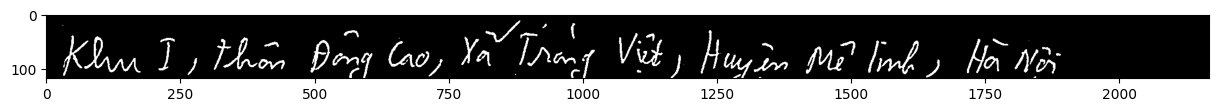

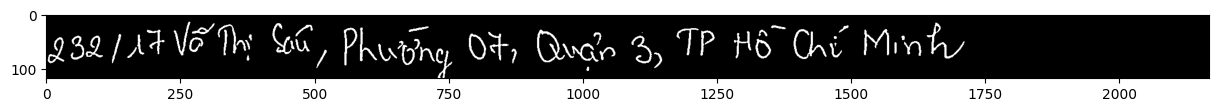

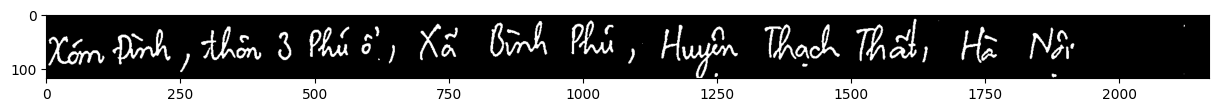

In [28]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(valid_img[i][:,:,0], cmap="gray")
    plt.show()

In [29]:
max_label_len = TIME_STEPS

In [30]:
# import padding library
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad mỗi output đầu ra với maximum text length
train_padded_txt = pad_sequences(training_txt, maxlen=max_label_len, padding='post', value = 0)
valid_padded_txt = pad_sequences(valid_txt, maxlen=max_label_len, padding='post', value = 0)

2025-07-19 03:50:55.550691: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752897055.788409      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752897055.859847      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [31]:
train_padded_txt[0]

array([ 11,  19,  10,  22,   0,  40,  61, 100,  57,   0,  37,  64,  46,
        57,  51,   0,  31,  52,  98,  53,   6,   0,  36,  52,  96, 124,
        57,  51,   0,  40,  75,  57,   0,  90, 115,  57,  52,   6,   0,
        37,  64, 102,  57,   0,  11,   6,   0,  40,  36,   0,  28, 119,
         0,  23,  52,  81,   0,  33,  53,  57,  52,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# Model Building

In [32]:
# import model, các layers khác nhau và activation function
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger, TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [33]:
# FULL MODEL OF CRNN AND LSTM

inputs = Input(shape=(118,2167,1))

# Block 1
x = Conv2D(64, (3,3), padding='same')(inputs)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_1 = x

# Block 2
x = Conv2D(128, (3,3), padding='same')(x)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_2 = x

# Block 3
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_3 = x

# Block4
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_3])
x = Activation('relu')(x)
x_4 = x

# Block5
x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_5 = x

# Block6
x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_5])
x = Activation('relu')(x)

# Block7
x = Conv2D(1024, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(3, 1))(x)
x = Activation('relu')(x)

x = MaxPool2D(pool_size=(3, 1))(x)

squeezed = Lambda(lambda x: K.squeeze(x, 1))(x)

# bidirectional LSTM layers với 512 units
blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(blstm_1)

outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)


act_model = Model(inputs, outputs)

I0000 00:00:1752897084.922040      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [34]:
act_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 118, 2167, │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 118, 2167, │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 39, 722,   │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 39, 722,   │          0 │ max_pooling2d[0]… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 39, 722,   │     73,856 │ activation[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 13, 240,   │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 13, 240,   │          0 │ max_pooling2d_1[… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 13, 240,   │    295,168 │ activation_1[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 13, 240,   │      1,024 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 13, 240,   │          0 │ batch_normalizat… │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 13, 240,   │    590,080 │ activation_2[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 240,   │      1,024 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 13, 240,   │          0 │ batch_normalizat… │
│                     │ 256)              │            │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 13, 240,   │          0 │ add[0][0]         │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 13, 240,   │  1,180,160 │ activation_3[0][… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 240,   │      2,048 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 13, 240,   │          0 │ batch_normalizat

 Total params: 21,965,197 (83.79 MB)

 Trainable params: 21,960,077 (83.77 MB)

 Non-trainable params: 5,120 (20.00 KB)

In [35]:
# define label input shape cho ctc
labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')


# define độ dài của input và label cho ctc
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

# define ctc lambda function để nhận arguments và trả về ctc_bach_cost
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    """
    labels: tensor (number of samples, max_string_length) containing the truth labels.
    y_pred: tensor (number of samples, time_steps, num_character_labels) containing the prediction, or output of the softmax.
    input_length: tensor (number of samples, 1) containing the sequence length for each batch item in y_pred.
    label_length: tensor (number of samples, 1) containing the sequence length for each batch item in y_true.
    """
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

# loss function
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

# model sử dụng lúc training
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

In [35]:
!cp /kaggle/input/file-h5/model.weights.h5 /kaggle/working/

In [37]:
!cp /kaggle/input/file-h5-v2/model.weights.h5 /kaggle/working/

In [36]:
!cp /kaggle/input/file-h5-final/model.weights.h5 /kaggle/working/

In [36]:
import os
# Tạo 1 thư mục để lưu cả log và file h5
history_dir = 'history'
history_path = os.path.join("/kaggle/working/", history_dir)

print(history_path)

# os.mkdir(history_path)

/kaggle/working/history


In [37]:
# ctc loss function và optimizers
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam')

callbacks = [
    # TensorBoard(
    #     log_dir='/content/drive/MyDrive/btl_deep_learning/history/logs',
    #     histogram_freq=10,
    #     profile_batch=0,
    #     write_graph=True,
    #     write_images=False,
    #     update_freq="epoch"),
    ModelCheckpoint(
        # filepath=os.path.join(history_path, 'model.weights.h5'),
        filepath='/kaggle/working/model.weights.h5',
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True,
        verbose=1),
    EarlyStopping(
        monitor='val_loss',
        min_delta=1e-8,
        patience=20,
        restore_best_weights=True,
        verbose=1),
    ReduceLROnPlateau(
        monitor='val_loss',
        min_delta=1e-8,
        factor=0.2,
        patience=10,
        verbose=1)
]
callbacks_list = callbacks

In [38]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 118, 2167, │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 118, 2167, │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 39, 722,   │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 39, 722,   │          0 │ max_pooling2d[0]… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 39, 722,   │     73,856 │ activation[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 13, 240,   │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 13, 240,   │          0 │ max_pooling2d_1[… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 13, 240,   │    295,168 │ activation_1[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 13, 240,   │      1,024 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 13, 240,   │          0 │ batch_normalizat… │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 13, 240,   │    590,080 │ activation_2[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 240,   │      1,024 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 13, 240,   │          0 │ batch_normalizat… │
│                     │ 256)              │            │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 13, 240,   │          0 │ add[0][0]         │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 13, 240,   │  1,180,160 │ activation_3[0][… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 240,   │      2,048 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 13, 240,   │          0 │ batch_normalizat

 Total params: 21,965,197 (83.79 MB)

 Trainable params: 21,960,077 (83.77 MB)

 Non-trainable params: 5,120 (20.00 KB)

In [39]:
# training data
training_img = np.array(training_img)
train_input_length = np.array(train_input_length)
train_label_length = np.array(train_label_length)

# validating data
valid_img = np.array(valid_img)
valid_input_length = np.array(valid_input_length)
valid_label_length = np.array(valid_label_length)

In [40]:
weight_path = '/kaggle/working/model.weights.h5'
if os.path.exists(weight_path):
    model.load_weights(weight_path)
    print("Đã load lại weight từ checkpoint.")
else:
    print("Không tìm thấy file weight!")

Đã load lại weight từ checkpoint.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 78 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# chọn batchsize and epochs

batch_size = 32
epochs = 100

history = model.fit(x=[training_img, train_padded_txt, train_input_length, train_label_length], 
          y=np.zeros(len(training_img)),
          batch_size=batch_size, 
          epochs = epochs,
          initial_epoch=14, # Bắt đầu từ epoch thứ 15
          validation_data = ([valid_img, valid_padded_txt, valid_input_length, valid_label_length], [np.zeros(len(valid_img))]),
          verbose = 1, callbacks = callbacks_list)

Epoch 15/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 65s/step - loss: 38.1783  
Epoch 15: val_loss improved from inf to 45.23825, saving model to /kaggle/working/model.weights.h5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3288s 71s/step - loss: 38.0874 - val_loss: 45.2383 - learning_rate: 0.0010
Epoch 16/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 65s/step - loss: 25.3440  
Epoch 16: val_loss did not improve from 45.23825
46/46 ━━━━━━━━━━━━━━━━━━━━ 3244s 71s/step - loss: 25.3462 - val_loss: 51.0892 - learning_rate: 0.0010
Epoch 17/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 65s/step - loss: 22.2098  
Epoch 17: val_loss improved from 45.23825 to 32.06895, saving model to /kaggle/working/model.weights.h5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3232s 70s/step - loss: 22.2017 - val_loss: 32.0689 - learning_rate: 0.0010
Epoch 18/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 64s/step - loss: 19.5063  
Epoch 18: val_loss improved from 32.06895 to 28.07634, saving model to /kaggle/working/model.weights.h5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3168s 69s/step - loss: 19.4920 

# Evaluation

In [41]:
act_model.load_weights(weight_path)
print("Đã load lại với weight tốt nhất.")

Đã load lại với weight tốt nhất.


In [56]:
# # dự đoán outputs trên validation images
# NO_PREDICTS = 14
# OFFSET=0
# # prediction = act_model.predict(valid_img[OFFSET:OFFSET+NO_PREDICTS])
# for img in valid_img:
#     prediction = act_model.predict(img)

In [42]:
print(type(valid_img))
print(len(valid_img))
print(valid_img[15].shape)

<class 'numpy.ndarray'>
368
(118, 2167, 1)


In [43]:
NO_PREDICTS = 100
OFFSET = 0

# valid_ìmg là list
valid_img_batch = np.stack(valid_img[OFFSET:OFFSET+NO_PREDICTS], axis=0)

prediction = act_model.predict(valid_img_batch)

I0000 00:00:1752897295.623992     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 823ms/step


In [44]:
prediction.shape

(100, 240, 141)

In [45]:
# Sử dụng CTC decoder
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])
# see the results
all_predictions =[]
i = 0
for x in out:
    print("original_text  = ", valid_orig_txt[i+OFFSET])
    print("predicted text = ", end = '')
    pred = ""
    for p in x:  
        if int(p) != -1:
            pred += char_list[int(p)]
    print(pred)
    all_predictions.append(pred)
    i+=1

original_text  =  Số 438, đường Khương Đình, Phường Hạ Đình, Quận Thanh Xuân, Hà Nội
predicted text = Số 411, tường Khưing, Đình, Phường Hạ Đình, Quyện Tach Xên, Hà NAn
original_text  =  Số 6 ngõ 276, đường Quảng Oai, Thị trấn Tây Đằng, Huyện Ba Vì, Hà Nội
predicted text = Số 6Ngõ 276, đường Quảng Quai, Thị trấn Tây Đồng, Huyện Ba V, Hà Nội
original_text  =  Khu I, thôn Đông Cao, Xã Tráng Việt, Huyện Mê Linh, Hà Nội
predicted text = Khu I, thôn Đồng Cao, Xã Trưng Việt, Huyện Mê Kinh, Hà Nộãi
original_text  =  232/17 Võ Thị Sáu, Phường 07, Quận 3, TP Hồ Chí Minh
predicted text = 238/17 Võ Thị Sái, Phường 07, Quận 3, TP Hồ Chí Minh
original_text  =  Xóm Đình, thôn 3 Phú ổ, Xã Bình Phú, Huyện Thạch Thất, Hà Nội
predicted text = xm Đình, thôm 2 Phú, Xã Bình Phú, Huyện Thạch Thất, Hà Nội
original_text  =  509A Hậu Giang, Phường 11, Quận 6, TP Hồ Chí Minh
predicted text = 508A Hậu Giang, Phường 11, Quận 6, TP Hồ Chí Minh
original_text  =  Thôn Phú Thành, Huyện Phú Riềng, Bình Phước
predicted

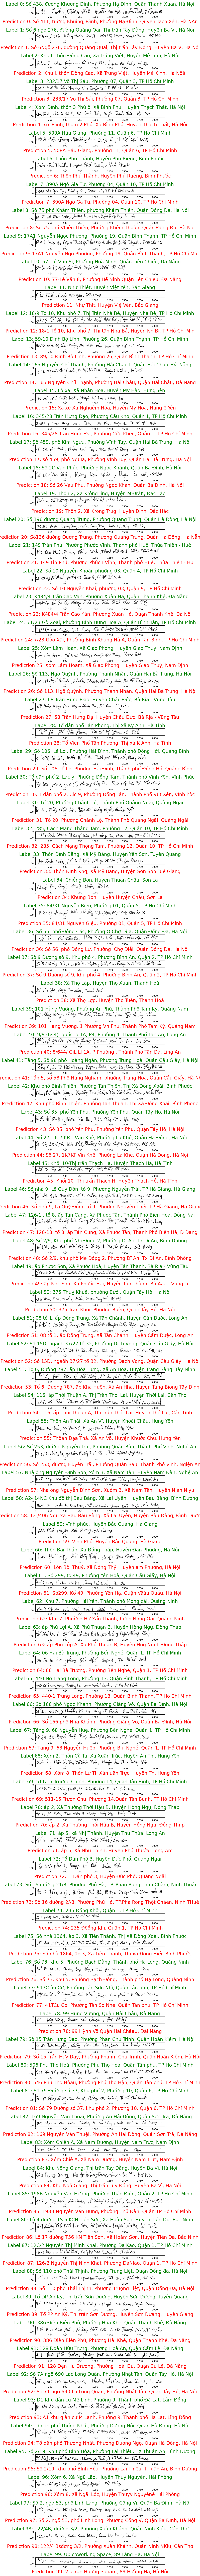

In [46]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,200))
col=0
row=1
gs1 = gridspec.GridSpec(NO_PREDICTS, 1)
# gs1.update(wspace=0.025, hspace=0.025)
for n in range(NO_PREDICTS):
    plt.subplot(gs1[n])
    plt.imshow(valid_img[n][:,:,0], cmap="gray_r")
    plt.title(f"Label {n}: "+valid_orig_txt[n+OFFSET], fontsize=20, color="green")
    plt.xlabel(f"Prediction {n}: "+all_predictions[n+OFFSET], fontsize=20, color="red")

In [47]:
!pip install editdistance

In [48]:
import string
import unicodedata
import editdistance


def ocr_metrics(predicts, ground_truth, norm_accentuation=False, norm_punctuation=False):
    """Calculate Character Error Rate (CER), Word Error Rate (WER) and Sequence Error Rate (SER)"""

    if len(predicts) == 0 or len(ground_truth) == 0:
        return (1, 1, 1)

    cer, wer, ser = [], [], []

    for (pd, gt) in zip(predicts, ground_truth):

        if norm_accentuation:
            pd = unicodedata.normalize("NFKD", pd).encode("ASCII", "ignore").decode("ASCII")
            gt = unicodedata.normalize("NFKD", gt).encode("ASCII", "ignore").decode("ASCII")

        if norm_punctuation:
            pd = pd.translate(str.maketrans("", "", string.punctuation))
            gt = gt.translate(str.maketrans("", "", string.punctuation))

        pd_cer, gt_cer = list(pd.lower()), list(gt.lower())
        dist = editdistance.eval(pd_cer, gt_cer)
        cer.append(dist / (max(len(pd_cer), len(gt_cer))))

        pd_wer, gt_wer = pd.lower().split(), gt.lower().split()
        dist = editdistance.eval(pd_wer, gt_wer)
        wer.append(dist / (max(len(pd_wer), len(gt_wer))))

        pd_ser, gt_ser = [pd], [gt]
        dist = editdistance.eval(pd_ser, gt_ser)
        ser.append(dist / (max(len(pd_ser), len(gt_ser))))

    cer_f = sum(cer) / len(cer)
    wer_f = sum(wer) / len(wer)
    ser_f = sum(ser) / len(ser)

    return (cer_f, wer_f, ser_f)

In [49]:
evaluate = ocr_metrics(predicts=all_predictions,
                                  ground_truth=valid_orig_txt,
                                  norm_accentuation=False,
                                  norm_punctuation=False)

e_corpus = "\n".join([
    "Metrics:",
    "Character Error Rate: {}".format(evaluate[0]),
    "Word Error Rate:      {}".format(evaluate[1]),
    "Sequence Error Rate:  {}".format(evaluate[2]),
])

In [50]:
print(e_corpus)

Metrics:
Character Error Rate: 0.10118896984141205
Word Error Rate:      0.2852891422303187
Sequence Error Rate:  0.98
